# Multiclass classification
---------------------------------

This example shows how to compare the performance of three models on a multiclass classification task.

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-wisconsin-diagnostic-dataset). This is a small and easy to train dataset whose goal is to predict wines into three groups (which cultivator it's from) using features based on the results of chemical analysis.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_wine
from atom import ATOMClassifier

In [2]:
# Load the dataset's features and targets
X, y = load_wine(return_X_y=True, as_frame=True)

# Let's have a look at a subsample of the data
X.sample(frac=1).iloc[:5, :8]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29
54,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40


## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, n_jobs=-1, warnings='ignore', verbose=2, random_state=1)

# Fit the pipeline with the selected models
atom.run(models=['LR','LDA', 'RF'],
         metric='roc_auc_ovr',
         n_calls=4,
         n_initial_points=3,
         bo_params={'base_estimator': 'rf', 'max_time': 100},
         bagging=5)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.
Parallel processing with 16 cores.
Applying data cleaning...

Dataset stats ================= >>
Shape: (178, 14)
Scaled: False
----------------------------------
Size of training set: 143
Size of test set: 35
----------------------------------
Class balance: 0:1:2 <==> 1.2:1.5:1.0
Instances in target per class:
|    |    total |    train_set |    test_set |
|---:|---------:|-------------:|------------:|
|  0 |       59 |           50 |           9 |
|  1 |       71 |           58 |          13 |
|  2 |       48 |           35 |          13 |


Running pipeline ============================= >>
Models in pipeline: LR, LDA, RF
Metric: roc_auc_ovr


Running BO for Logistic Regression...
Random start 1 ----------------------------------
Parameters --> {'max_iter': 335, 'solver': 'sag', 'class_weight': None, 'penalty': 'l2', 'C': 0.001}
Evaluation --> roc_auc_ovr: 0.9970  Best roc_auc_ovr: 0.9970
Tim

## Analyze the results

In [4]:
# We can access the pipeline's results via the results attribute
atom.results

,name,score_bo,time_bo,score_train,score_test,time_fit,mean_bagging,std_bagging,time_bagging,time
model,,,,,,,,,,
LR,Logistic Regression,1.000000,12.464s,1.000000,0.997669,0.018s,0.998135,0.000932,0.046s,12.535s
LDA,Linear Discriminant Analysis,1.000000,0.531s,1.000000,1.000000,0.012s,0.999767,0.000466,0.034s,0.583s
RF,Random Forest,0.993712,2.452s,0.999725,0.982517,0.753s,0.973686,0.011577,3.200s,6.411s


In [5]:
# Show the scoring for a different metric than the one we trained on
atom.scoring('precision_macro')

Results ===================== >>
Logistic Regression          --> precision_macro: 0.976
Linear Discriminant Analysis --> precision_macro: 0.976
Random Forest                --> precision_macro: 0.9


**Let's have a closer look at the Random Forest**

In [6]:
# Get the results on some other metrics
print('Jaccard score:', atom.rf.scoring('jaccard_weighted'))
print('Recall score:', atom.rf.scoring('recall_macro'))

Jaccard score: 0.7957142857142857
Recall score: 0.8974358974358975


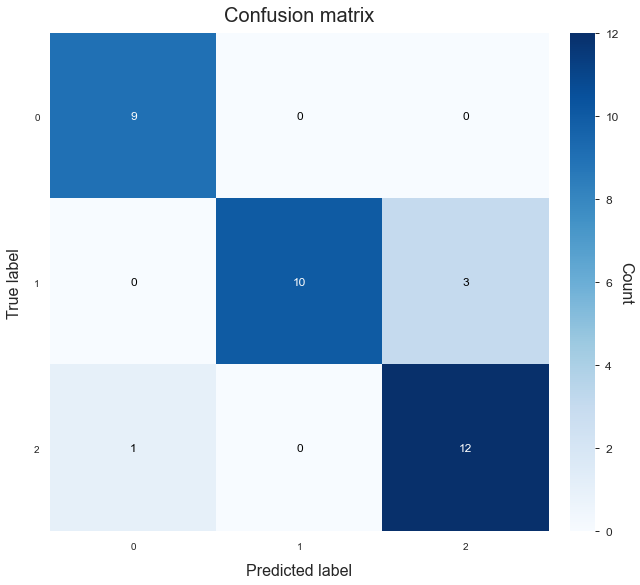

In [7]:
# Plot the confusion matrix
atom.RF.plot_confusion_matrix(figsize=(9, 9))

In [8]:
# Save the model as a pickle file
atom.RF.save_model('Random_Forest_model')

Random Forest model saved successfully!
